In [1]:
#loading the dataset

import pandas as pd
import numpy as np

df=pd.read_csv("Abalone.csv")

In [2]:
df.columns

Index(['Gender', 'Length', 'Diameter', 'Height', 'Whole_Height',
       'Shucked_Weight', 'Viscera_Weight', 'Shell_Weight', 'Rings'],
      dtype='object')

In [3]:
df.head()

,Gender,Length,Diameter,Height,Whole_Height,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.tail()

,Gender,Length,Diameter,Height,Whole_Height,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [5]:
df.sample(4)

,Gender,Length,Diameter,Height,Whole_Height,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
1577,I,0.490,0.40,0.135,0.6240,0.3035,0.1285,0.169,8
382,M,0.485,0.40,0.135,0.6630,0.3130,0.1370,0.200,10
2140,F,0.450,0.36,0.125,0.5065,0.2220,0.1050,0.160,10
1344,M,0.585,0.47,0.165,1.4090,0.8000,0.2290,0.295,10


In [6]:
#checking for datatypes

df.dtypes

Gender             object
Length            float64
Diameter          float64
Height            float64
Whole_Height      float64
Shucked_Weight    float64
Viscera_Weight    float64
Shell_Weight      float64
Rings               int64
dtype: object

In [7]:
#checking for null values

df.isnull().sum()

Gender            0
Length            0
Diameter          0
Height            0
Whole_Height      0
Shucked_Weight    0
Viscera_Weight    0
Shell_Weight      0
Rings             0
dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

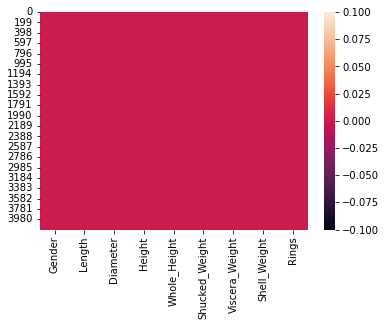

In [9]:
sns.heatmap(df.isnull())

# EDA:

M    1528
I    1342
F    1307
Name: Gender, dtype: int64


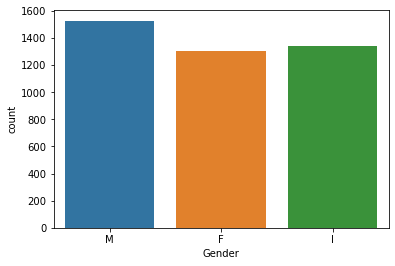

In [10]:
sns.countplot(df['Gender'])
print(df['Gender'].value_counts())

<AxesSubplot:xlabel='Gender', ylabel='Rings'>

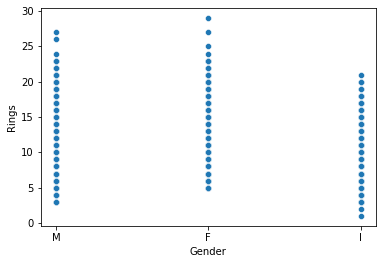

In [11]:
sns.scatterplot('Gender','Rings',data=df)

<AxesSubplot:xlabel='Length', ylabel='Rings'>

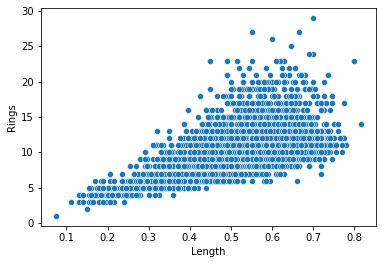

In [12]:
sns.scatterplot('Length','Rings',data=df)

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

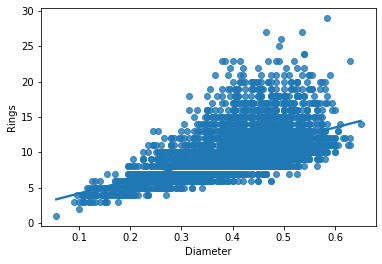

In [13]:
sns.regplot('Diameter','Rings',data=df)

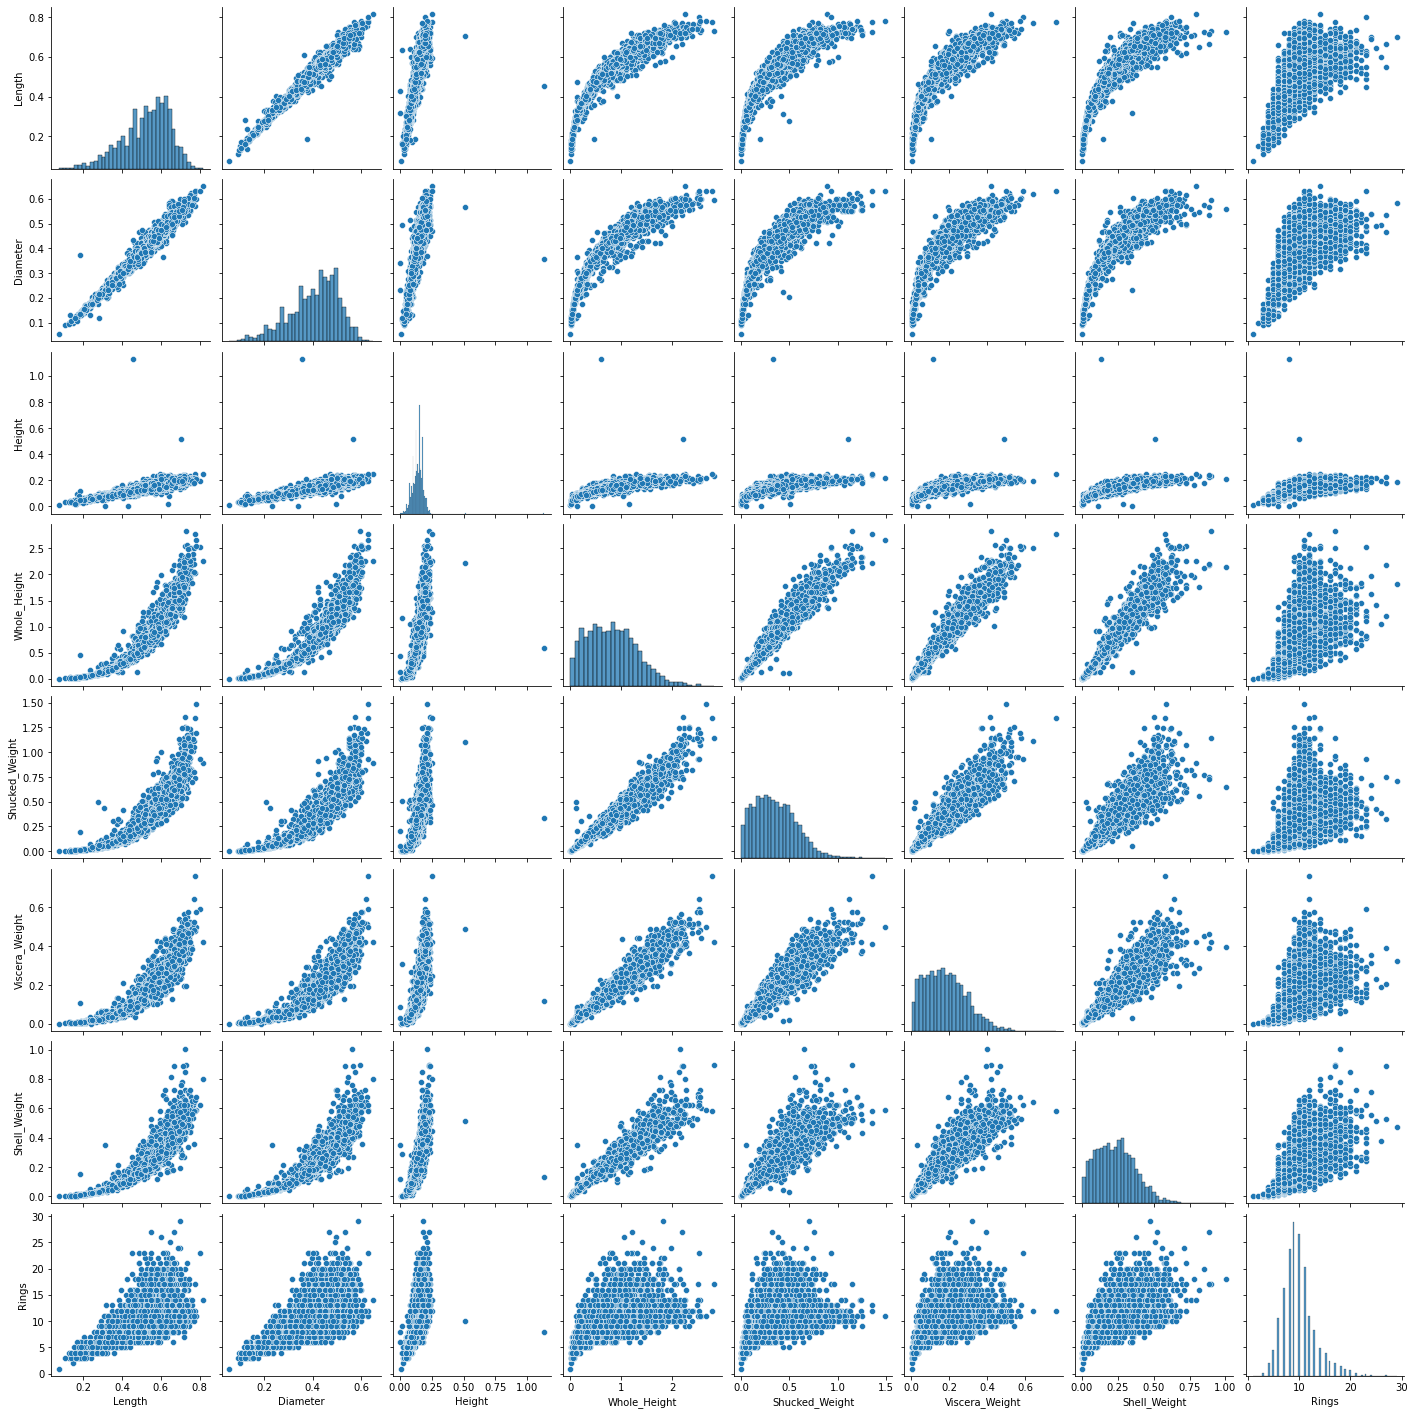

In [14]:
sns.pairplot(df)

it can be seen that 'height' has poorly distributed data which means that skewness is present.
-Also this pairplot shows the sign of multicollinearity.

In [15]:
df['Gender']

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Gender, Length: 4177, dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder

lencode=LabelEncoder()
df['Gender']=lencode.fit_transform(df['Gender'])

In [17]:
df['Gender']

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Gender, Length: 4177, dtype: int32

In [18]:
df.corr()

,Gender,Length,Diameter,Height,Whole_Height,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
Gender,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_Height,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_Weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_Weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_Weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [19]:
df.corr()['Rings'].sort_values()

Gender           -0.034627
Shucked_Weight    0.420884
Viscera_Weight    0.503819
Whole_Height      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell_Weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

<AxesSubplot:>

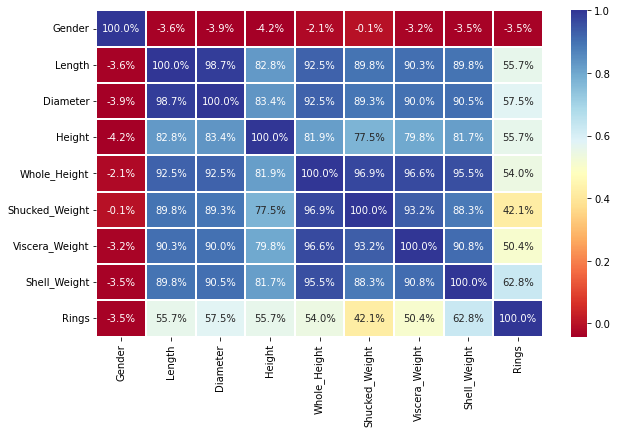

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt='.1%',cmap='RdYlBu',linewidth=2) 

-it can be seen that 'Gender' is has weakest correlation bond with our target variable while 'Shell_weight' has the strongest.
-all the other columns has good bond with target variable.

In [21]:
#describing the dataset

df.describe()

,Gender,Length,Diameter,Height,Whole_Height,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


observations:
- as the difference between median and mean for all the columns isn't much that means only little skewness might be there.
- few outliers are also present

# data cleaning:

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_Height    4177 non-null   float64
 5   Shucked_Weight  4177 non-null   float64
 6   Viscera_Weight  4177 non-null   float64
 7   Shell_Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 277.5 KB


In [21]:
df.corr()['Rings'].sort_values()

Gender           -0.034627
Shucked_Weight    0.420884
Viscera_Weight    0.503819
Whole_Height      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell_Weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [22]:
#dropping the 'Gender' column as it is weakly correlated with the target variable

df.drop('Gender',inplace=True,axis=1)

In [23]:
df

,Length,Diameter,Height,Whole_Height,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [24]:
#checking for outliers

from scipy.stats import zscore

z=np.abs(zscore(df))

In [25]:
np.where(z>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
        1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
        1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2623, 

In [26]:
z.iloc[6,7]

3.12251641377204

In [27]:
df_new=df[(z<3).all(axis=1)]

In [28]:
df.shape

(4177, 8)

In [29]:
df_new.shape

(4027, 8)

In [30]:
print('data loss is:',(4177-4027)/4177*100,'%')

data loss is: 3.5910940866650707 %


In [31]:
#selecting features and target variable

x=df_new.drop('Rings',axis=1)
y=df_new['Rings']

In [32]:
x.shape

(4027, 7)

In [33]:
y.shape

(4027,)

In [34]:
#checking for skewness

x.skew()

Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole_Height      0.334204
Shucked_Weight    0.458295
Viscera_Weight    0.437116
Shell_Weight      0.349471
dtype: float64

-let's suppose the threshold for skewness is +/- 0.65, so every column is falling under this only.

In [35]:
#checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [36]:
vif_calc()

   VIF Factor        features
0  706.509581          Length
1  762.624431        Diameter
2   91.864214          Height
3  441.433768    Whole_Height
4  108.400684  Shucked_Weight
5   65.474924  Viscera_Weight
6   94.717628    Shell_Weight


In [37]:
#dropping the 'length' feature as it has high VIF while weak correlation than 'Diameter' feature

x=x.drop('Length',axis=1)

In [38]:
#scaling the input data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

<AxesSubplot:xlabel='Rings', ylabel='count'>

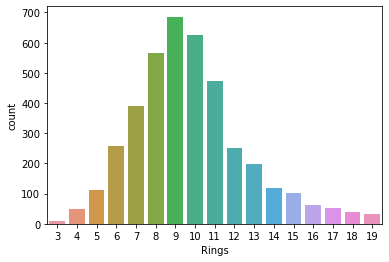

In [39]:
sns.countplot(y)

-it can be seen that the data is highly imbalanced as some classes has high count.

In [40]:
#over sampling imbalanced data

from imblearn.over_sampling import SMOTE

smt=SMOTE()

train_x,train_y=smt.fit_resample(x,y)

In [41]:
x.shape

(4027, 6)

In [42]:
train_x.shape

(11662, 6)

<AxesSubplot:xlabel='Rings', ylabel='count'>

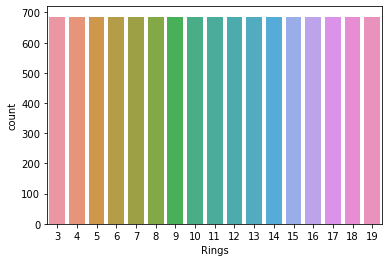

In [43]:
sns.countplot(train_y)

In [44]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [45]:
#treating as classifier problem

knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

In [46]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=i,test_size=.30)
    knn.fit(x_train,y_train)
    predtrain=knn.predict(x_train)
    predtest=knn.predict(x_test)
    if accuracy_score(predtest,y_test)*100>65:
        print('At random state',i,'the model performs very well')
        print('At random state',i,':')
        print('Training accuracy score is',accuracy_score(predtrain,y_train)*100)
        print('Testing accuracy score is',accuracy_score(predtest,y_test)*100,'\n')

At random state 23 the model performs very well
At random state 23 :
Training accuracy score is 76.38123239005267
Testing accuracy score is 65.16147470705917 

At random state 40 the model performs very well
At random state 40 :
Training accuracy score is 76.6997427416391
Testing accuracy score is 65.79022577879394 

At random state 75 the model performs very well
At random state 75 :
Training accuracy score is 76.99375229694965
Testing accuracy score is 65.1328951128894 



In [47]:
#using random state as 40 only

x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=40,test_size=.30)
knn.fit(x_train,y_train)
predtrain=knn.predict(x_train)
predknn=knn.predict(x_test)

In [48]:
for j in range(2,20):
    lss=cross_val_score(knn,train_x,train_y,cv=j)
    lsc=lss.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',lsc*100)
    print('Accuracy score is:',accuracy_score(predknn,y_test)*100,'\n')

At cv= 2
Cross Validation Score is: 61.670382438689764
Accuracy score is: 65.79022577879394 

At cv= 3
Cross Validation Score is: 64.30295905630355
Accuracy score is: 65.79022577879394 

At cv= 4
Cross Validation Score is: 66.35252184081675
Accuracy score is: 65.79022577879394 

At cv= 5
Cross Validation Score is: 66.52409422860457
Accuracy score is: 65.79022577879394 

At cv= 6
Cross Validation Score is: 66.89295028334982
Accuracy score is: 65.79022577879394 

At cv= 7
Cross Validation Score is: 67.08969302006517
Accuracy score is: 65.79022577879394 

At cv= 8
Cross Validation Score is: 67.43323466581556
Accuracy score is: 65.79022577879394 

At cv= 9
Cross Validation Score is: 67.46762635651523
Accuracy score is: 65.79022577879394 

At cv= 10
Cross Validation Score is: 67.90486227164696
Accuracy score is: 65.79022577879394 

At cv= 11
Cross Validation Score is: 67.76756773360192
Accuracy score is: 65.79022577879394 

At cv= 12
Cross Validation Score is: 67.95662165770301
Accuracy sco

In [49]:
#hyperparameter tuning

from sklearn.model_selection import GridSearchCV

In [50]:
parameters={'n_neighbors':[i for i in range(10)],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
knn=KNeighborsClassifier()
clf=GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 1}


In [51]:
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=40,test_size=.30)
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
predtrain=knn.predict(x_train)
predtest=knn.predict(x_test)
print(accuracy_score(predtest,y_test)*100)

73.44955701629037


In [52]:
dtc=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'max_features':['auto', 'sqrt', 'log2']}
clf=GridSearchCV(dtc,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'auto'}


In [53]:
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=40,test_size=.30)
dtc=DecisionTreeClassifier(criterion='entropy',max_features='auto')
dtc.fit(x_train,y_train)
predtrain=dtc.predict(x_train)
predtestdtc=dtc.predict(x_test)
print(accuracy_score(predtestdtc,y_test)*100)

56.90197199199771


In [54]:
from sklearn.ensemble import RandomForestClassifier

parameters={'criterion':['gini','entropy','log_loss'],'max_features':['sqrt','log2']}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'sqrt'}


In [55]:
#Ensemble:

rf=RandomForestClassifier(criterion='entropy',max_features='sqrt')
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=40,test_size=.30)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

rfscore=accuracy_score(y_test,predrf)

print('accuracy_score:',rfscore*100)

rfcscore=cross_val_score(rf,train_x,train_y,cv=5)
rfc=rfcscore.mean()
print('Cross Validation Score for Random Forest:',rfc*100)

accuracy_score: 71.07745070020006
Cross Validation Score for Random Forest: 73.66705902852576


In [56]:
#as the KNeighborsClassifier with hyperparameter tuning giving us best result,we will go with it only

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=i,test_size=.30)
    knn=KNeighborsClassifier(n_neighbors=1)
    knn.fit(x_train,y_train)
    predtrain=knn.predict(x_train)
    predtest=knn.predict(x_test)
    if accuracy_score(predtest,y_test)*100>75:
        print('at random state i:',i)
        print(accuracy_score(predtest,y_test)*100,'\n')

at random state i: 74
75.13575307230637 



In [57]:
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=74,test_size=.30)
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
predtrain=knn.predict(x_train)
predknn=knn.predict(x_test)
afinal=accuracy_score(predknn,y_test)

In [58]:
knn=KNeighborsClassifier(n_neighbors=1)
for j in range(2,20):
    lss=cross_val_score(knn,train_x,train_y,cv=j)
    lsc=lss.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',lsc*100)
    print('Accuracy score is:',afinal*100,'\n')

At cv= 2
Cross Validation Score is: 72.38038072371806
Accuracy score is: 75.13575307230637 

At cv= 3
Cross Validation Score is: 75.33883300636677
Accuracy score is: 75.13575307230637 

At cv= 4
Cross Validation Score is: 76.11933450507874
Accuracy score is: 75.13575307230637 

At cv= 5
Cross Validation Score is: 76.58243753028184
Accuracy score is: 75.13575307230637 

At cv= 6
Cross Validation Score is: 76.72848419319608
Accuracy score is: 75.13575307230637 

At cv= 7
Cross Validation Score is: 76.89075630252101
Accuracy score is: 75.13575307230637 

At cv= 8
Cross Validation Score is: 76.9344199941063
Accuracy score is: 75.13575307230637 

At cv= 9
Cross Validation Score is: 77.07174767359953
Accuracy score is: 75.13575307230637 

At cv= 10
Cross Validation Score is: 77.31136117443535
Accuracy score is: 75.13575307230637 

At cv= 11
Cross Validation Score is: 77.28560389160037
Accuracy score is: 75.13575307230637 

At cv= 12
Cross Validation Score is: 77.28641932927319
Accuracy score

In [59]:
lss=cross_val_score(knn,train_x,train_y,cv=3)
lsc=lss.mean()

In [60]:
print('The Model is performing well with KNeighborsClassifier:')
print('with accuracy score:',afinal*100)
print('cross validation score:',lsc*100)

The Model is performing well with KNeighborsClassifier:
with accuracy score: 75.13575307230637
cross validation score: 75.33883300636677


In [61]:
preddf=pd.DataFrame({'Original Rings':y_test,'Predicted Rings':predknn})
preddf

,Original Rings,Predicted Rings
347,12,14
10632,18,18
1357,7,7
11563,19,19
8953,15,15
...,...,...
692,17,17
11537,19,19
2242,9,12
9871,17,17


In [62]:
import pickle

filename='abloneage.pkl'

pickle.dump(knn,open(filename,'wb'))